In [1]:
# imports
from pymatreader import read_mat
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from nilearn import plotting
%matplotlib inline

/Users/b1059770/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/b1059770/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/b1059770/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base m

In [2]:
# set paths
COR_STAT_RESULTS = 'data/cor_brain.nii'
ERF_PATH = 'data/erf_timeseries.mat'
TRF_PATH = 'data/trf_timeseries.mat'

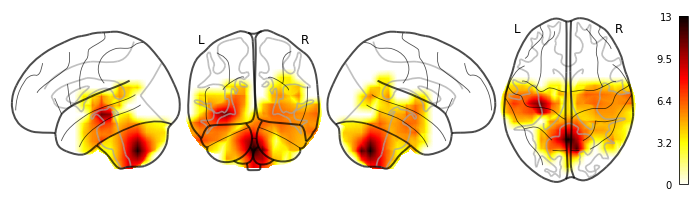

In [3]:
# plot the results of the performed correlation test
display = plotting.plot_glass_brain(COR_STAT_RESULTS,
                          black_bg = False,
                          plot_abs = True,
                          display_mode='lyrz',
                          colorbar=True,
                          cmap=plotting.cm.ocean_hot);

In [4]:
def plot_timeseries(timeseries_path, key, color_id):
    
    """This function plots the timeseries data for the ERF/TRF"""
    
    data = read_mat(timeseries_path)
    df = pd.DataFrame(np.transpose(data[key]))
    df['time'] = np.arange(0.,10.1,0.1) #add a timescale 
    df_tidy = pd.melt(df, id_vars=['time'])
    df_tidy.rename(columns={'variable': 'subject'}, inplace=True)
    ax = sns.lineplot(
                  x='time',
                  y='value',
                  data=df_tidy,
                  color=sns.color_palette('deep')[color_id],
                  linewidth=2,
                  ci=95,
                  ax=None)
    
    ax.set_ylabel("Amplitude (zscore)")
    ax.set_xlabel("Time (ms)")
    sns.despine()
    
    # set aspect ratio
    plt.axis([0, 10, -1, 3]);

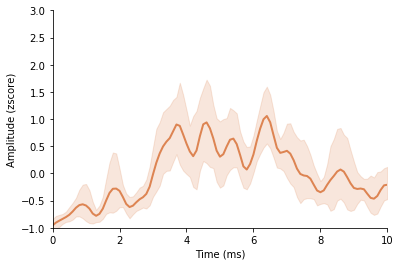

In [5]:
plot_timeseries(ERF_PATH, 'data_erf', 1)

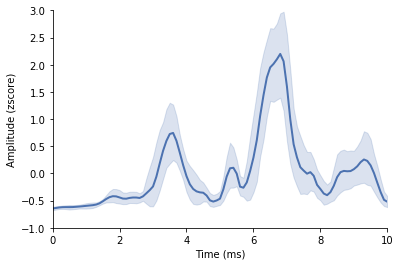

In [6]:
plot_timeseries(TRF_PATH, 'data_trf', 0)